## Week 5 Scratch Paper and Notes

In [2]:
## Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')
#import folium
#import plotly.express as px

In [4]:
## Data Filepaths
# boston_filepath = "/content/drive/MyDrive/Data/bostonHousing1978.csv"
# mortgage_filepath = "/content/drive/MyDrive/Data/mortgages.csv"
# linear_filepath = "/content/drive/MyDrive/Data/linear.csv"
# linearW_filepath = "/content/drive/MyDrive/Data/linearWithWithout.csv"
# passenger_filepath = "/content/drive/MyDrive/Data/passenger_modified.csv"
# kingcounty_filepath = "/content/drive/MyDrive/Data/kingCountyHouseData.csv"
# cancer_filepath = "/content/drive/MyDrive/Data/wisconsinBreastCancer.csv"
# olympic_filepath = "/content/drive/MyDrive/Data/athleteEventsNoPersonal.csv"
insurance_filepath = "/content/drive/MyDrive/Data/insurance.csv"
cali_filepath = "/content/drive/MyDrive/Data/cali_housing.csv"
apartment_filepath = '/content/drive/MyDrive/Data/apartments.csv'
medical_filepath = '/content/drive/MyDrive/Data/Raw_Medical_Data_for_day1.csv'

In [5]:
ins_df = pd.read_csv(insurance_filepath)

In [6]:
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Train Test Split

**Target (y)**
- The target is the column we are trying to predict.

**Features (X)**
- The features are the columns we will use to make the prediction. 

**Feature selection** is the process of selecting which features (columns) we want to use within our machine learning model. There are often columns that are not going to be helpful for the machine learning process. 

In [7]:
# Assign the target column to y
y = ins_df['charges']
# Assign the features to X (In this case we include all columns except the target column)
X = ins_df.drop(columns = 'charges')

In [8]:
cali_df = pd.read_csv(cali_filepath)

In [9]:
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
# The target we are trying to predict
y = cali_df['MedHouseVal']
# The features we will use to make the prediction
X = cali_df.drop(columns = 'MedHouseVal')

In [11]:
#Import TTS from sklearn
from sklearn.model_selection import train_test_split
# Run Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

In [12]:
len(X_train)

15480

In [13]:
len(X_test)

5160

# Features
Three different types of features: Numeric, Ordinal, and Nominal. 

All must be transformed into numeric form (integer or float) to be interpreted by a machine learning algorithm.

## Numeric Features
Integers or Floats that represent a quantity. Sometimes referred to as quantitiative features.
- Should always be integer or float data types. 
- Examples: Price, MPG, Number of bedrooms.

As these are already in numeric format Numeric Features can be used without further transformation. Sometimes they will need to be scaled (more later)

## Ordinal Features
Categorical, represent different classes that have a distinct ordering.
- can be either strings or integers representing an ordered class.
- Example: low, medium, high; one star, two stars, three stars...

Ordinal features represented by strings will need to be mapped to numeric values. IE low, medium, high will be transformed to 0, 1, 2. 

In [14]:
tshirt_path = '/content/drive/MyDrive/Data/Tshirt.xlsx'
tshirt_df = pd.read_excel(tshirt_path)
tshirt_df.head()

,Size,Color,Cost,Sold
0,S,Blue,5.00,Y
1,M,Red,7.49,Y
2,M,Green,8.00,N
3,XL,Green,4.00,N
4,L,Red,9.99,Y


In [15]:
# Assign Features
y = tshirt_df['Sold']
X = tshirt_df.drop(columns = 'Sold')

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 37)

In [16]:
sizes = {'S': 0, 'M': 1, 'L': 2, 'XL': 3}

X_train['Size'] = X_train['Size'].replace(sizes)

X_train.head()

,Size,Color,Cost
7,3,Red,8.90
8,0,Green,9.00
3,3,Green,4.00
2,1,Green,8.00
6,2,Blue,4.32


## Nominal Features
Categories that represent a different class. Are NOT ordered
- can be represented by strings or integers (representing nonordered class).
- Example: Male, Female; Red, Green, Blue, Yellow; etc

Unfortunately Nominal Features cannot be as easily mapped as their Ordinal Counterparts. You do not want to give a series of values/numbers to Nominal Features as it would imply weight/value relative to one another... IE Red, Green, Blue, Yellow cannot be coded as 0, 1, 2, 3 because they do not share that relationship with one another.

This can be solved through One hot econding... changing these values into binary yes/no columns 

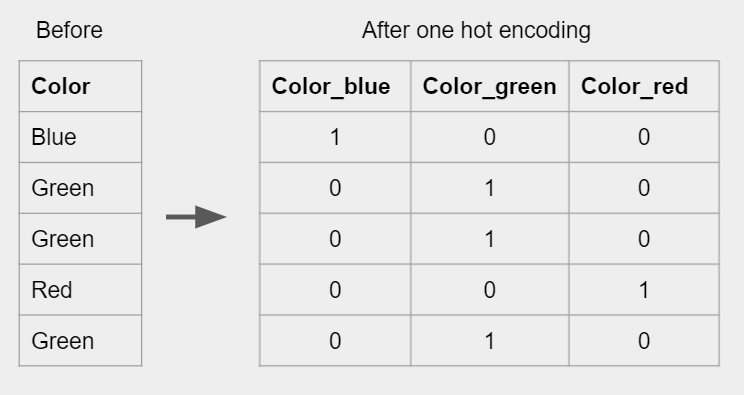

# Scale and Standardization

Scale: Changing the range of values. Doesn't change the shape of the distribution or proportions... just makes them smaller.

Standardize: Usually means making the mean of the set 0 and the standard deviation 1.
-    standardized_feature = (feature - mean_of_feature) / std_dev_of_feature

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
apartment_df = pd.read_csv(apartment_filepath)
apartment_df.head()

,Sold,SqFt,Price
0,1,200,906442
1,0,425,272629
2,1,675,824862
3,1,984,720344
4,0,727,879679


In [19]:
y = apartment_df['Sold']
X = apartment_df.drop(columns = 'Sold')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [21]:
X_train.describe().round(0)

,SqFt,Price
count,75.0,75.0
mean,564.0,524950.0
std,285.0,274185.0
min,114.0,109277.0
25%,320.0,272804.0
50%,588.0,503613.0
75%,836.0,786078.0
max,997.0,995878.0


In [22]:
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [23]:
# Transform the training data
train_scaled = scaler.transform(X_train)

# transform the test data
test_scaled = scaler.transform(X_test)

# View the first 5 rows of the train_select
train_scaled[:5]

array([[-1.37431725,  1.72912293],
       [ 1.34901239, -0.33899825],
       [ 1.35959527, -0.23730597],
       [ 1.1197165 , -1.01916082],
       [ 0.98919422,  1.07150845]])

In [24]:
X_train_scaled = pd.DataFrame(train_scaled, columns=X_train.columns)
X_train_scaled.head()

,SqFt,Price
0,-1.374317,1.729123
1,1.349012,-0.338998
2,1.359595,-0.237306
3,1.119716,-1.019161
4,0.989194,1.071508


In [25]:
X_train_scaled.describe().round(2)

,SqFt,Price
count,75.00,75.00
mean,-0.00,0.00
std,1.01,1.01
min,-1.59,-1.53
25%,-0.86,-0.93
50%,0.09,-0.08
75%,0.96,0.96
max,1.53,1.73


# One Hot Encoding Example

Process: 
 1. Import necessary packages 
 2. load data 
 3. Split the data columns into X (features) and y (target) 
 4. Split the data rows into training and testing sets. 
 5. Ordinal encode ordinal categorical data 
 6. Split nominal categorical columns from the dataframe 
 7. Fit a OneHotEncoder class on the training features 
 8. Use the fitted OneHotEncoder to transform both the categorical training features and the testing features into one-hot encoded versions. 
 9. Convert the resulting Numpy arrays back into Pandas dataframes 
 10. Concatenate the numeric columns with the new, one-hot encoded features.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [27]:
med_df = pd.read_csv(medical_filepath)
display(med_df.head())


,Unnamed: 0,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,1,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1.0,1.0,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,2,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,3,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,4,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,5,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0.0,NaN,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [28]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   State               1000 non-null   object 
 2   Lat                 1000 non-null   float64
 3   Lng                 1000 non-null   float64
 4   Area                1000 non-null   object 
 5   Children            993 non-null    float64
 6   Age                 1000 non-null   int64  
 7   Income              1000 non-null   float64
 8   Marital             1000 non-null   object 
 9   Gender              1000 non-null   object 
 10  ReAdmis             1000 non-null   int64  
 11  VitD_levels         1000 non-null   float64
 12  Doc_visits          1000 non-null   int64  
 13  Full_meals_eaten    1000 non-null   int64  
 14  vitD_supp           1000 non-null   int64  
 15  Soft_drink          1000 non-null   int64  
 16  Initial

In [29]:
# Object Columns are the ones that will need to be either OHE or Ordinally encoded...
med_types = med_df.dtypes
med_types[med_types == 'object'].index

# State, Area, Marital, Gender, Initial_Admin, Complication_risk, and Services are all object dtypes
# Complication Risk is ordinal. The rest are nominal

Index(['State', 'Area', 'Marital', 'Gender', 'Initial_admin',
       'Complication_risk', 'Services'],
      dtype='object')

## Ordinal Encoding
Complication risk is an ordered feature so will be ordinally encoded

In [30]:
med_df['Complication_risk'].value_counts()

Medium    462
High      312
Low       222
Med         4
Name: Complication_risk, dtype: int64

In [31]:
comp_dict = {'Low':0, 'Med':1, 'Medium':1, 'High':2}
med_df['Complication_risk'].replace(comp_dict, inplace =True)

med_df['Complication_risk'].value_counts()

1    466
2    312
0    222
Name: Complication_risk, dtype: int64

In [32]:
## Train Test Split

In [33]:
y = med_df['Additional_charges']
X = med_df.drop(columns = ['Unnamed: 0', 'Additional_charges'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Column Selector


In [34]:
#apply make_column_selector using the dtype_include arguement. Other options are dtype_exclude

cat_selector = make_column_selector(dtype_include='object')

In [35]:
cat_selector(X_train)

['State', 'Area', 'Marital', 'Gender', 'Initial_admin', 'Services']

In [36]:
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_train[cat_selector(X_test)]
train_cat_data

,State,Area,Marital,Gender,Initial_admin,Services
82,TN,Urban,Never Married,Female,Emergency Admission,Intravenous
991,AL,Urban,Married,Male,Emergency Admission,Blood Work
789,TN,Urban,Married,Nonbinary,Observation Admission,Intravenous
894,SD,Rural,Never Married,Male,Observation Admission,Blood Work
398,MI,Suburban,Widowed,Female,Elective Admission,Blood Work
...,...,...,...,...,...,...
106,NY,Suburban,Widowed,Male,Observation Admission,Intravenous
270,IN,Suburban,Married,Male,Observation Admission,Blood Work
860,OH,Urban,Divorced,Male,Elective Admission,Blood Work
435,CA,Suburban,Separated,Male,Observation Admission,Blood Work


## One Hote Encoding
Default values aren't ideal

- sparse = False: By default (True) provides a 'sparse matrix' to save memory but cannot be used in a normal array/dataframe. False provides a dense array.

- handle_unknown = 'ignore': if test and training data contain different values it will throw an error unless set to ignore. Happens if fit data ends up with more/less categories.  

In [37]:
# Instantiate endocer
ohe_encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')

# fit OHE to training data
ohe_encoder.fit(train_cat_data)

# Transform Data
train_ohe = ohe_encoder.transform(train_cat_data)
test_ohe = ohe_encoder.transform(test_cat_data)
train_ohe

#output is a numpy array which is fine for modeling but hard to read...

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
ohe_column_names = ohe_encoder.get_feature_names_out(train_cat_data.columns)
train_ohe = pd.DataFrame(train_ohe, columns = ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns = ohe_column_names)
train_ohe.head()

,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_PR,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_F,Gender_Female,Gender_Male,Gender_Nonbinary,Gender_f,Gender_m,Gender_male,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Concatenate Back together...


In [39]:
num_selector = make_column_selector(dtype_include = 'number')

train_nums = X_train[num_selector(X_train)].reset_index(drop = True)
test_nums = X_test[num_selector(X_test)].reset_index(drop = True)

X_train_processed = pd.concat([train_nums, train_ohe], axis = 1)
X_test_processed = pd.concat([test_nums, test_ohe], axis = 1)
X_train_processed

,Lat,Lng,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,...,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_PR,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_F,Gender_Female,Gender_Male,Gender_Nonbinary,Gender_f,Gender_m,Gender_male,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
0,36.16307,-86.66510,2.0,60,8459.99,0,19.034162,5,1,0,0,0,1,1,1,0.0,0.0,1.0,1.0,0.0,0.0,0,0,6.714754,3097.337588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,34.96594,-87.12179,5.0,78,22669.31,0,15.903388,7,1,0,0,0,0,1,1,0.0,0.0,1.0,1.0,0.0,0.0,1,0,5.694359,3073.408768,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,36.24648,-83.51232,1.0,60,25536.25,0,18.225040,4,1,0,1,1,1,2,1,1.0,0.0,0.0,1.0,0.0,0.0,1,0,7.336514,3199.418504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,45.42189,-97.91165,7.0,82,94863.57,0,15.809932,5,0,2,1,1,0,2,0,1.0,1.0,0.0,1.0,0.0,0.0,0,0,13.172367,3693.118743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,42.33661,-83.28292,0.0,37,30898.36,0,20.640410,5,1,0,0,0,0,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0,0,7.257809,2616.316061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,42.05701,-77.43901,1.0,32,4788.93,0,19.029312,6,1,0,0,1,0,1,1,1.0,0.0,0.0,0.0,1.0,1.0,0,1,1.641752,2321.176987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
746,40.47773,-86.38658,4.0,27,29461.62,0,15.293840,5,0,0,0,0,1,2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0,15.908995,3633.310014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
747,40.56510,-81.07429,0.0,57,79094.04,0,19.459084,5,0,0,0,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1,1,20.220180,3644.114869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
748,33.97472,-1

# Column Transformer
Automatically scales numeric features and one hot encodes categorical features and recombines them back into one dataset.

In [40]:
med_df = pd.read_csv(medical_filepath)
med_df.head()

,Unnamed: 0,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,1,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1.0,1.0,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,2,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,3,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,4,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,5,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0.0,NaN,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [41]:
X = med_df.drop(columns = 'Additional_charges')
y = med_df['Additional_charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [42]:
# Instantiate categorical and numerical column selectors
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

In [43]:
#Instantiate scaler and OHE
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')#, sparse=False)

In [44]:
# create tuples for use in Column Transformer
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [45]:
from sklearn.compose import make_column_transformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [46]:
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f757b29a090>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f757b29a110>)])

In [47]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [48]:
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-1.451820,-0.508205,0.281935,-0.065104,0.272586,-1.123467,0.0,0.509399,-0.008943,0.014639,-0.620174,-0.588642,-0.827885,2.016821,0.638067,-0.764110,-0.624440,1.374056,1.194450,-0.688774,-0.815125,-0.855629,-0.671325,-0.422185,-0.234058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.710118,-0.720642,0.252836,1.235813,1.119125,-0.619881,0.0,-0.999823,1.907372,0.014639,-0.620174,-0.588642,-0.827885,-0.495830,0.638067,-0.764110,-0.624440,1.374056,1.194450,-0.688774,-0.815125,1.168730,-0.671325,-0.592430,-0.273783,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.007465,-0.493403,0.482823,-0.498743,0.272586,-0.518276,0.0,0.119354,-0.967100,0.014639,-0.620174,1.698826,1.207898,2.016821,0.638067,1.308712,-0.624440,-0.727772,1.194450,-0.688774,-0.815125,1.168730,-0.671325,-0.318450,-0.064588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.372705,1.134821,-0.434666,2.103090,1.307245,1.938720,0.0,-1.044875,-0.008943,-0.983474,2.762592,1.698826,1.207898,-0.495830,-1.567234,1.308712,1.601435,-0.727772,1.194450,-0.688774,-0.815125,-0.855629,-0.671325,0.655215,0.755028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.352620,0.587322,0.497439,-0.932382,-0.809103,-0.328240,0.0,1.283708,-0.008943,0.014639,-0.620174,-0.588642,-0.827885,-0.495830,0.638067,1.308712,-0.624440,1.374056,-0.837206,-0.688774,-0.815125,-0.855629,-0.671325,-0.331581,-1.032626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [49]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 101 entries, 0 to 100
dtypes: float64(101)
memory usage: 591.9 KB


# Simple Imputer
Helps address missing values while preventing data leaks. Imputes values to replace NaN based on the training data and applies the results to the training and test datasets separately. 

<br>Imputation Strategies:
- 'mean', fill missing values with the mean of the column they are in.
- 'median', fill missing values with the median of the column they are in.
- 'mode', fill missing values with the mode of the column they are in.
- 'most_frequent', fill missing values with the most frequent value in the column they are in (equivalent to 'mode' for numeric columns).
- 'constant', provide a constant value to use to fill missing values.  A common choice for categorical data is 'missing'

<br> SimpleImputer Process
1. Import necessary libraries.
2. Load and examine the data.
3. Identify which columns have missing values and decide what imputation strategy to use to fill them.
4. Instantiate numeric and categorical column selectors.
5. Instantiate SimpleImputer objects with the imputation strategies we want to use.
6. Use ColumnTransformer to apply each different SimpleImputer object to the appropriate columns.
7. Examine the data to ensure all missing data has been filled.

### Example

In [52]:
med_df = pd.read_csv(medical_filepath)

,Unnamed: 0,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,1,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1.0,1.0,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,2,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,3,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,4,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,5,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0.0,NaN,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [56]:
display(med_df.head())
print('\n')
med_df.info()

,Unnamed: 0,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,1,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1.0,1.0,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,2,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,3,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,4,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,5,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0.0,NaN,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   State               1000 non-null   object 
 2   Lat                 1000 non-null   float64
 3   Lng                 1000 non-null   float64
 4   Area                1000 non-null   object 
 5   Children            993 non-null    float64
 6   Age                 1000 non-null   int64  
 7   Income              1000 non-null   float64
 8   Marital             1000 non-null   object 
 9   Gender              1000 non-null   object 
 10  ReAdmis             1000 non-null   int64  
 11  VitD_levels         1000 non-null   float64
 12  Doc_visits          1000 non-null   int64  
 13  Full_meals_eaten    1000 non-null   int64  
 14  vitD_supp           1000 non-null   int64  
 15  Soft_drink          1000 non-null   int64  
 16  Initi

In [58]:
med_df.isna().sum()

Unnamed: 0            0
State                 0
Lat                   0
Lng                   0
Area                  0
Children              7
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             6
Diabetes              6
Hyperlipidemia        2
BackPain              8
Anxiety               2
Allergic_rhinitis     6
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

In [60]:
X = med_df.drop(columns = ['Additional_charges'])
y = med_df['Additional_charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [66]:
num_sel = make_column_selector(dtype_include='number')
cat_sel = make_column_selector(dtype_include = 'object')

In [67]:
# Instantiate Imputer
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

In [68]:
# Tuples for transformer
num_tuple = (median_imputer, num_selector)
cat_tuple = (freq_imputer, cat_selector)

# Create Column Transformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer-1',
                                 SimpleImputer(strategy='median'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f757b29a090>),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f757b29a110>)])

In [69]:
col_transformer.fit(X_train)
# transform both the training and testing data (this will output a NumPy array)
X_train_imputed = col_transformer.transform(X_train)
X_test_imputed = col_transformer.transform(X_test)
# change the result back to a dataframe
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_train_imputed.isna().any()

Unnamed: 0            False
State                 False
Lat                   False
Lng                   False
Area                  False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis     False
Reflux_esophagitis    False
Asthma                False
Services              False
Initial_days          False
TotalCharge           False
dtype: bool

# Pipelines
A wrapper which contains multiple transformers or models and performs them on data in sequence. DIFFERENT from ColumnTransformer which performs operations in parallel. 
- Works on all transformers that have a .fit() and .transform() method.
- Uses less code and reduces risk of leakage. 

<br> Pipeline Process:
0. Import Necessary Libraries
1. Load Data
2. Inspect the Data
3. Validation Split
4. Instantiate the Transformers
5. Instantiate the Pipeline Using Transformers
6. Fit Pipeline on the Training Data
7. Transform Both the Training and Testing Data
8. Inspect the Result.

### Example

In [71]:
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQG5QTgHn7O1FaenQgpiHadFAza6cfG-cXznWh9a_Z-QWsbsrv3iJ5MpDdSSKTK7ZpTpRosOkK_LR_E/pub?output=csv'
df = pd.read_csv(path, index_col='CountryYear')
df.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
CountryYear,,,,,,,,,,,,,,,,,,,,
Afghanistan2015,0,65.0,263,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan2014,0,59.9,271,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan2013,0,59.9,268,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan2012,0,59.5,272,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan2011,0,59.2,275,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [72]:
print(df.info(), '\n')
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, Afghanistan2015 to Zimbabwe2000
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2928 non-null   int64  
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   int64  
 3   infant deaths                    2928 non-null   int64  
 4   Alcohol                          2735 non-null   float64
 5   percentage expenditure           2928 non-null   float64
 6   Hepatitis B                      2375 non-null   float64
 7   Measles                          2928 non-null   int64  
 8   BMI                              2896 non-null   float64
 9   under-five deaths                2928 non-null   int64  
 10  Polio                            2909 non-null   float64
 11  Total expenditure                2702 non-null   float64
 12  Dip

In [73]:
# Divide Features and Train Test Split
X = df.drop(columns = ['Life expectancy'])
y = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [74]:
# Instantiate Transformers
median_imputer = SimpleImputer(strategy = 'median')
scaler = StandardScaler()

In [75]:
# Instantiate Pipeline
preprocessing = make_pipeline(median_imputer, scaler)
preprocessing

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [76]:
preprocessing.fit(X_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [79]:
X_train_processed = preprocessing.transform(X_train)
X_test_processed = preprocessing.transform(X_test)

In [80]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values \n')
X_train_processed

0 missing values 



array([[ 0.        , -0.81229166, -0.26366021, ..., -0.87868801,
         1.19451878,  1.92222335],
       [ 0.        ,  1.43809769,  0.15576412, ...,  0.58477555,
         0.22791761,  0.08271906],
       [ 0.        ,  2.02690924, -0.18501814, ...,  0.87303352,
        -0.68443553, -0.80637468],
       ...,
       [ 0.        , -1.10266448, -0.11511409, ..., -0.10260885,
        -0.88170108, -1.17427554],
       [ 0.        , -0.73163255, -0.24618419, ..., -0.96738278,
         0.97259504,  0.87983758],
       [ 0.        ,  1.43003177, -0.20249416, ...,  1.07259673,
        -3.11080174, -2.24731971]])

# Pipelines and ColumnTransformer 